In [ ]:
#*****************************************************************
#If you have any questions please use Q&A section 
#Author - sumit.joshi091@gmail.com
#*****************************************************************

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

In [2]:
df = web.DataReader('Reliance.Ns', data_source = 'yahoo', start = '2016-01-01', end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,509.450012,504.100006,504.899994,507.674988,2476270.0,486.155640
2016-01-04,506.899994,493.350006,502.500000,497.649994,13793142.0,476.555573
2016-01-05,505.000000,498.500000,500.149994,502.575012,6832918.0,481.271790
2016-01-06,519.200012,500.200012,503.799988,516.099976,12233710.0,494.223511
2016-01-07,514.000000,504.024994,510.524994,506.625000,9024438.0,485.150116
...,...,...,...,...,...,...
2019-12-27,1546.199951,1521.300049,1527.000000,1542.349976,8081591.0,1536.580322
2019-12-30,1547.650024,1528.050049,1545.949951,1544.199951,7828402.0,1538.423462
2019-12-31,1543.699951,1508.050049,1542.000000,1514.050049,10150467.0,1508.386353


Text(0, 0.5, 'Price')

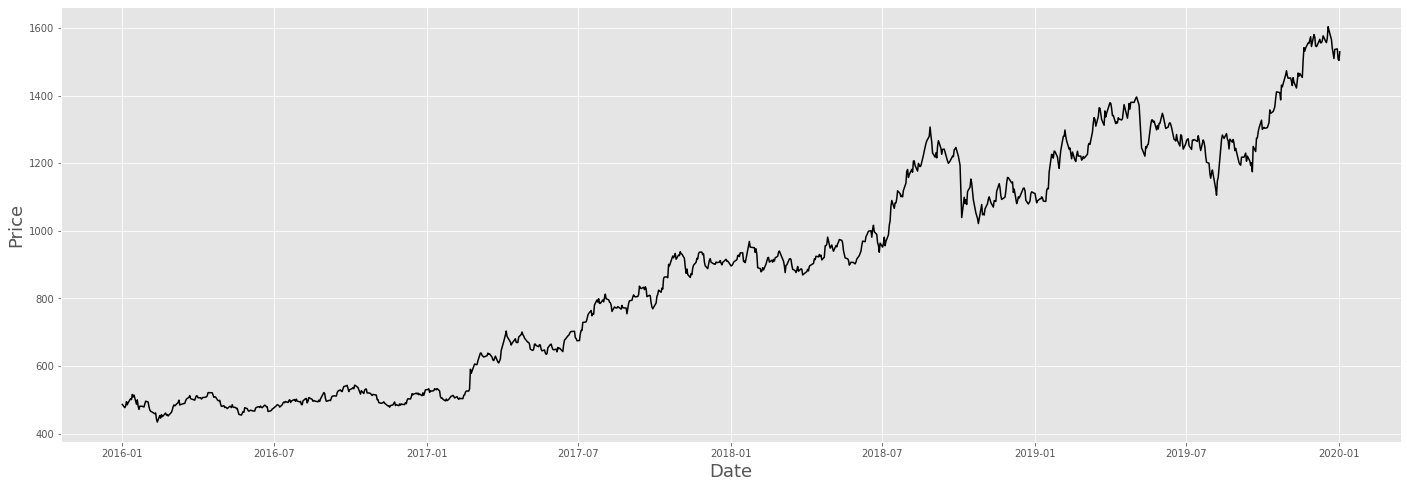

In [3]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [4]:
SMA_50 = df['Adj Close'].rolling(window = 50).mean()
SMA_200 = df['Adj Close'].rolling(window = 200).mean()

Text(0, 0.5, 'Price')

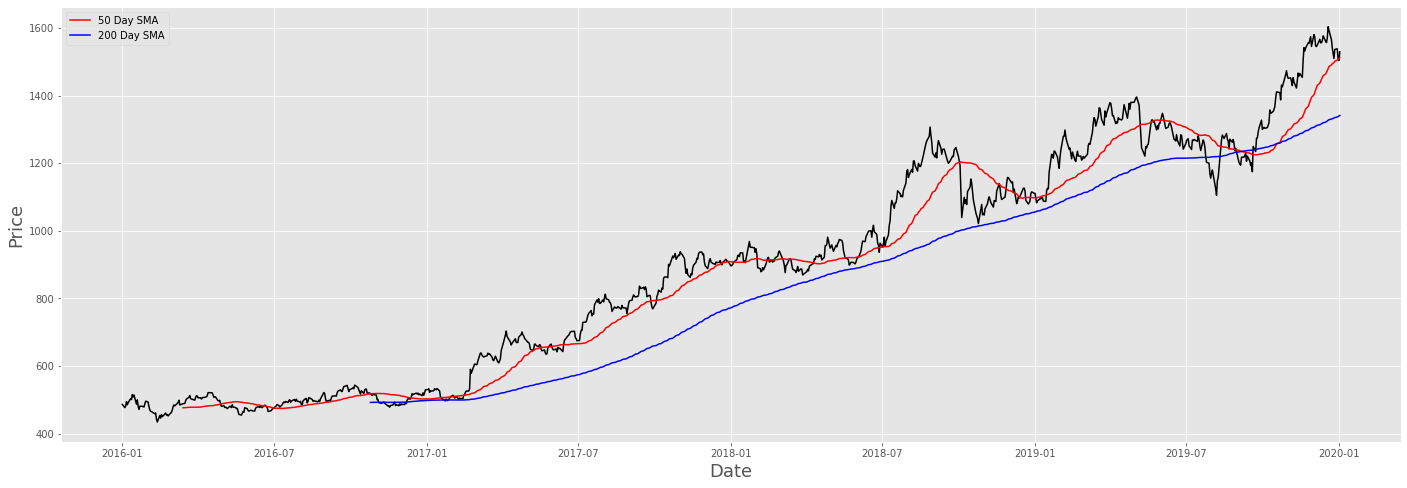

In [5]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(SMA_50, label = '50 Day SMA', color = 'red')
plt.plot(SMA_200, label = '200 Day SMA', color = 'blue')
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [6]:
EMA_50 = df['Adj Close'].ewm(span = 50).mean()
EMA_200 = df['Adj Close'].ewm(span = 200).mean()

Text(0, 0.5, 'Price')

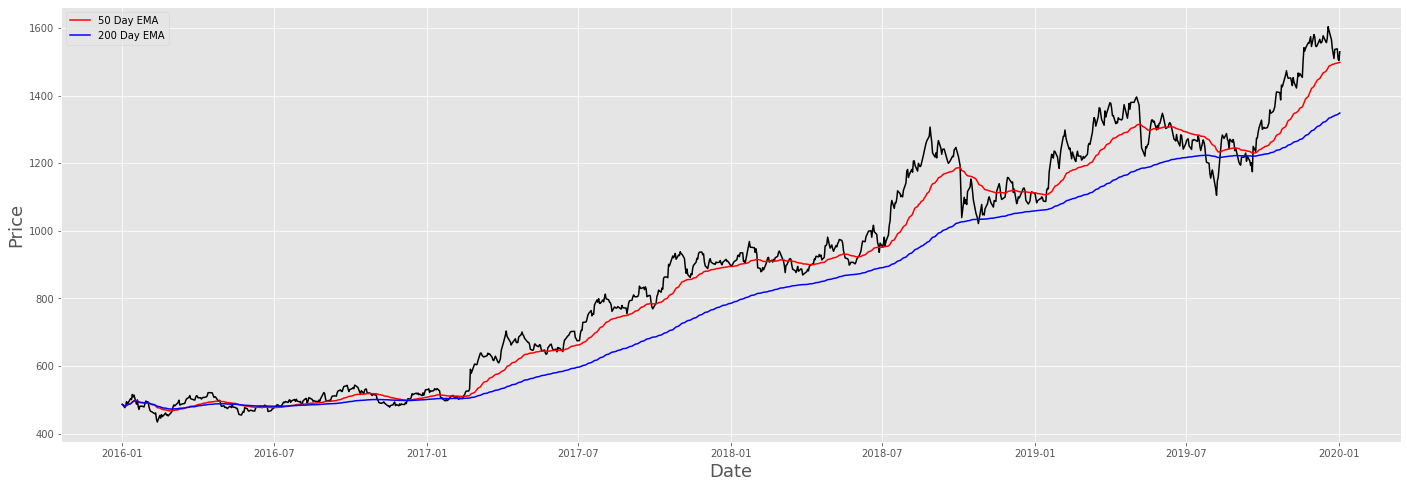

In [7]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(EMA_50, label = '50 Day EMA', color = 'red')
plt.plot(EMA_200, label = '200 Day EMA', color = 'blue')
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)

In [8]:
df['SMA_50'] = df['Adj Close'].rolling(window = 50).mean()
df['SMA_200'] = df['Adj Close'].rolling(window = 200).mean()

crossover = ((SMA_50 <= SMA_200) & (SMA_50.shift(1) > SMA_200.shift(1)) |
             (SMA_50 >= SMA_200) & (SMA_50.shift(1) < SMA_200.shift(1)))

crossover_price = df.loc[crossover, 'SMA_200']

print(crossover_price)

Date
2019-09-06    1235.050873
2019-10-22    1259.563940
Name: SMA_200, dtype: float64


Text(0, 0.5, 'Price')

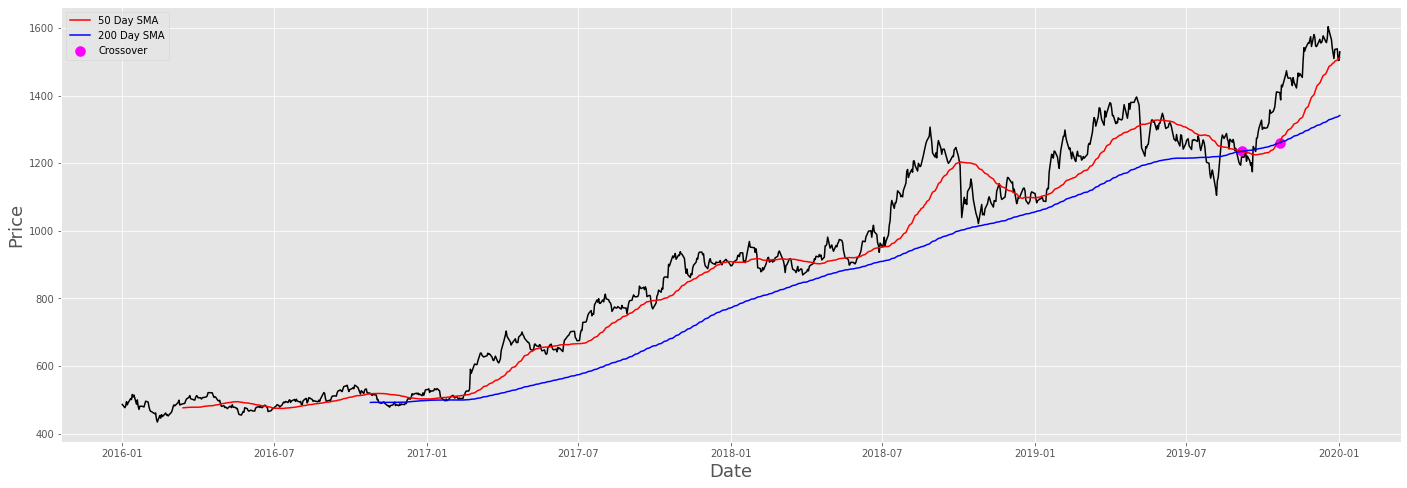

In [9]:
plt.figure(figsize = (24, 8))
plt.plot(df['Adj Close'], color = 'black')
plt.plot(SMA_50, label = '50 Day SMA', color = 'red')
plt.plot(SMA_200, label = '200 Day SMA', color = 'blue')
plt.scatter(crossover_price.index, crossover_price, label = 'Crossover', color = 'magenta', s = 100)
plt.legend()

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)